In [7]:
import sys, os
module_path = os.path.abspath(os.getcwd()+'/..')

sys.path.append(module_path)

from benchmark.runs.run import Run
from benchmark.runs.warmup import Warmup
from benchmark.runs.vllm import vLLMRun
from benchmark.main import Benchmark
from benchmark.dataset import Dataset


In [ ]:

# With encoding

async def load_test(model: str, dataset: Dataset, name: str)

    api: str = "http://localhost:8000/v1/completions"

    # Configure runs
    warmup: Run = vLLMRun(model=model, dataset=dataset, passes=500, api_url=api)

    run1: Run = vLLMRun(model=model, dataset=dataset, passes=1, api_url=api)
    run5: Run = vLLMRun(model=model, dataset=dataset, passes=5, api_url=api)
    run10: Run = vLLMRun(model=model, dataset=dataset, passes=10, api_url=api)
    run20: Run = vLLMRun(model=model, dataset=dataset, passes=20, api_url=api)
    run40: Run = vLLMRun(model=model, dataset=dataset, passes=40, api_url=api)
    run100: Run = vLLMRun(model=model, dataset=dataset, passes=100, api_url=api)
    run200: Run = vLLMRun(model=model, dataset=dataset, passes=200, api_url=api)
    run500: Run = vLLMRun(model=model, dataset=dataset, passes=500, api_url=api)
    run1000: Run = vLLMRun(model=model, dataset=dataset, passes=1000, api_url=api)
    run2000: Run = vLLMRun(model=model, dataset=dataset, passes=2000, api_url=api)
    run5000: Run = vLLMRun(model=model, dataset=dataset, passes=5000, api_url=api)
    run10000: Run = vLLMRun(model=model, dataset=dataset, passes=10000, api_url=api)



    # Configure classes
    benchmark = Benchmark(name="vLLM", runs=[warmup, run1, run5, run10, run20, run40, run100, run200, run500, run1000, run2000, run5000, run10000])

    await benchmark.run_async()

    print(benchmark.collect_results())


Total progress:   0%|          | 0/13 [00:00<?, ?it/s]

[codecarbon WARNING @ 12:18:54] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 12:18:54] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 12:18:55] We saw that you have a 13th Gen Intel(R) Core(TM) i9-13900K but we don't know it. Please contact us.
100%|██████████| 500/500 [00:13<00:00, 36.82it/s]
[codecarbon WARNING @ 12:19:08] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 12:19:08] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 12:19:10] We saw that you have a 13th Gen Intel(R) Core(TM) i9-13900K but we don't know it. Please contact us.
100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
[codecarbon WARNING @ 12:19:10] Multiple

{'benchmark_name': 'vLLM-20241218-121854', 'timestamp': '20241218-122914', 'cpu_count': 32, 'cpu_model': '13th Gen Intel(R) Core(TM) i9-13900K', 'gpu_count': 2, 'gpu_model': '2 x NVIDIA GeForce RTX 3090', 'os': 'Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39', 'country_name': 'Netherlands', 'country_iso_code': 'NLD', 'region': None, 'python_version': '3.11.0', 'codecarbon_version': '2.8.1', 'longtitude': None, 'latitude': None, 'ram_total_size': 62.69314956665039, 'cpu_power': 42.5, 'gpu_power': 98.14953991220978, 'ram_power': 23.509931087493896, 'total_duration': 629.9640078770062, 'total_cpu_energy': 0.007437067140026352, 'total_gpu_energy': 0.023609571109864003, 'total_ram_energy': 0.00411284540696945, 'runs': [{'name': '', 'passes': 1, 'model': 'EleutherAI/pythia-70m', 'dataset': 'Rowan/hellaswag', 'timestamp': '2024-12-18T12:19:10', 'duration': 0.786232476002624, 'cpu_energy': 9.281753700699686e-06, 'gpu_energy': 2.1373628210002993e-05, 'ram_energy': 5.115594567403

In [ ]:
dataset: Dataset = Dataset(name="Rowan/hellaswag", split="train", column="ctx")
model: str = "EleutherAI/pythia-70m"



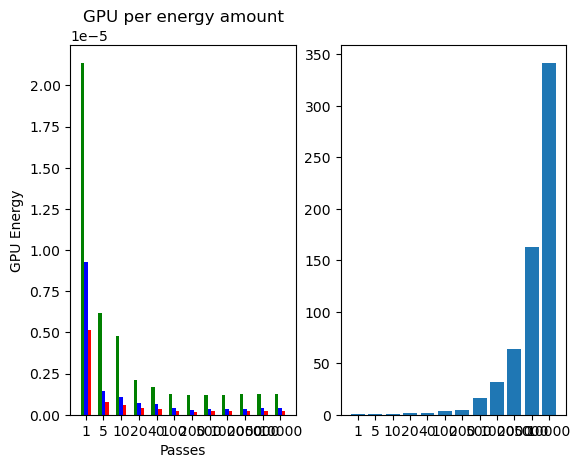

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json


# Graph data


def data_from_json(file: str, type: str) -> [float]:
    data = json.load(open(file))

    return [data["runs"][0][type], data["runs"][1][type], data["runs"][2][type], data["runs"][3][type], data["runs"][4][type], data["runs"][5][type], data["runs"][6][type], data["runs"][7][type], data["runs"][8][type], data["runs"][9][type], data["runs"][10][type], data["runs"][11][type]]


x = np.arange(12)

results1 = data_from_json("results_vLLM-20241218-121854.json", "gpu_energy")
#  results2 = data_from_json("resultsV3.json", "gpu_energy")
#   results3 = data_from_json("results_with_encoding-20241203-174821.json", "gpu_energy")
#   results4 = data_from_json("results_with_encoding-20241203-195144.json", "gpu_energy")
#   results5 = data_from_json("results_with_encoding-20241203-200703.json", "gpu_energy")

ram_energy1 = data_from_json("results_vLLM-20241218-121854.json", "ram_energy")
#   ram_energy2 = data_from_json("resultsV3.json", "ram_energy")
#   ram_energy3 = data_from_json("results_with_encoding-20241203-174821.json", "ram_energy")
#   ram_energy4 = data_from_json("results_with_encoding-20241203-195144.json", "ram_energy")
#   ram_energy5 = data_from_json("results_with_encoding-20241203-200703.json", "ram_energy")

cpu_energy1 = data_from_json("results_vLLM-20241218-121854.json", "cpu_energy")
#   cpu_energy2 = data_from_json("resultsV3.json", "cpu_energy")
#   cpu_energy3 = data_from_json("results_with_encoding-20241203-174821.json", "cpu_energy")
#   cpu_energy4 = data_from_json("results_with_encoding-20241203-195144.json", "cpu_energy")
#   cpu_energy5 = data_from_json("results_with_encoding-20241203-200703.json", "cpu_energy")

duration1 = data_from_json("results_vLLM-20241218-121854.json", "duration")
#   duration2 = data_from_json("resultsV3.json", "duration")
#   duration3 = data_from_json("results_with_encoding-20241203-174821.json", "duration")
#   duration4 = data_from_json("results_with_encoding-20241203-195144.json", "duration")
#   duration5 = data_from_json("results_with_encoding-20241203-200703.json", "duration")


x_values = [1, 5, 10, 20, 40, 100, 200, 500, 1000, 2000, 5000, 10000]

gpu = np.divide(np.mean([results1], axis=0), x_values)
ram = np.divide(np.mean([ram_energy1], axis=0), x_values)
cpu = np.divide(np.mean([cpu_energy1], axis=0), x_values)
time = np.mean([duration1], axis=0)

x_labels = ["1", "5", "10", "20", "40", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.subplot(1, 2, 1)
plt.bar(x-0.2, gpu, color="g", align="center", width=0.2)
plt.bar(x+0.2, ram, color="r", align="center", width=0.2)
plt.bar(x, cpu, color="b", align="center", width=0.2)

plt.xlabel("Passes")
plt.ylabel("GPU Energy")
plt.title("GPU per energy amount")
plt.xticks(x, x_labels)

plt.subplot(1, 2, 2)
plt.bar(x, time)
plt.xticks(x, x_labels)

plt.show()
